## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical


reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

new_Y = to_categorical(Y,2)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

reviews = reviews.replace({"br": ""}, regex=True)

vectorizer = CountVectorizer(max_features=10000)

y = np.array(Y)
X = vectorizer.fit_transform(reviews[0]).toarray()

# How the data is split: train: 70%, validation: 15%, test: 15%
X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.30, random_state=42) 


In [ ]:
print(X.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


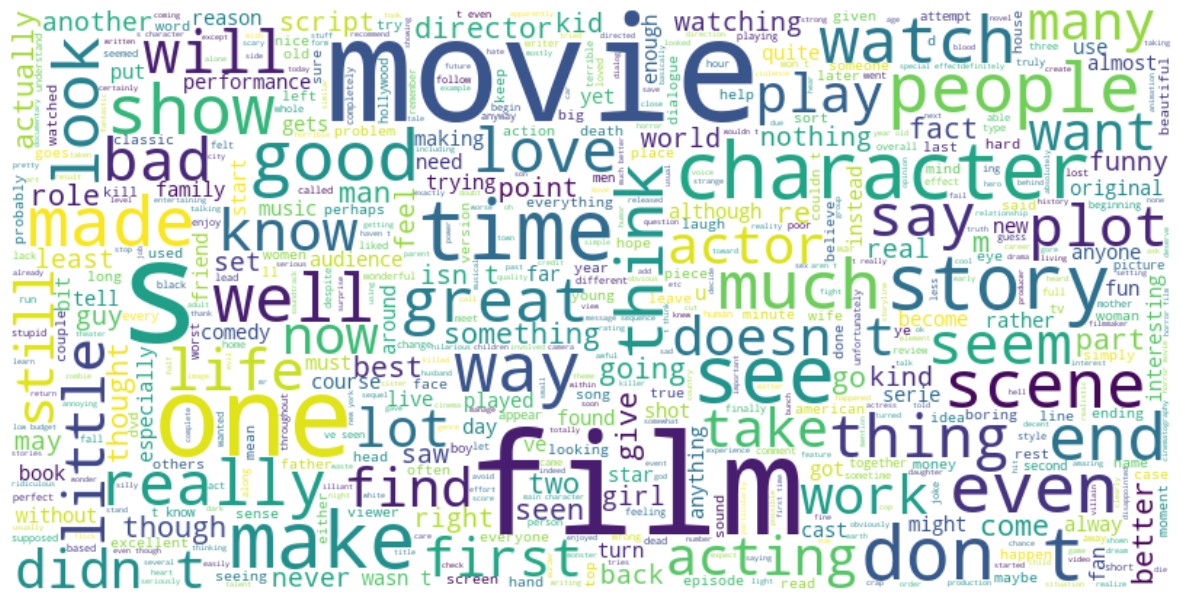

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(word for word in reviews[0])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=10000, background_color="white").generate(text)

# Display the word cloud image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()


In [14]:
X.shape[1]

10000

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
input_dim = X.shape[1]

model = tf.keras.Sequential()
model.add(layers.Dense(units=1000, input_dim=input_dim, activation="tanh"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(units=2, activation="softmax"))


model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])  
sgd = optimizers.SGD(learning_rate = 0.1)  # I use SGD because we have learned about it and I sort off understand what happens

In [ ]:

model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2) 

print("Accuracy on training data: {}".format(model.evaluate(X_train, y_train)))

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8856 - loss: 0.3021 - val_accuracy: 0.7811 - val_loss: 0.7012
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8871 - loss: 0.3000 - val_accuracy: 0.8651 - val_loss: 0.3408
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9065 - loss: 0.2502 - val_accuracy: 0.8706 - val_loss: 0.3295
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9123 - loss: 0.2428 - val_accuracy: 0.8543 - val_loss: 0.3908
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8946 - loss: 0.2705 - val_accuracy: 0.8803 - val_loss: 0.3250
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9145 - loss: 0.2318 - val_accuracy: 0.8283 - val_loss: 0.4647
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9018 - loss: 0.2570 - val_accuracy: 0.8831 - val_loss: 0.3284
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9075 - loss: 0.2591 - 

In [19]:
print("The accurracy for the test data: {}".format(model.evaluate(X_test, y_test)))

history_df = pd.DataFrame(history.history)
history_df

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8707 - loss: 0.4053
The accurracy for the test data: [0.3825218081474304, 0.8774666786193848]


,accuracy,loss,val_accuracy,val_loss
0,0.888571,0.295645,0.781143,0.701232
1,0.886429,0.297467,0.865143,0.340759
2,0.898643,0.266454,0.870571,0.329478
3,0.903000,0.264079,0.854286,0.390801
4,0.900714,0.263529,0.880286,0.325031
5,0.903143,0.268083,0.828286,0.464707
6,0.901929,0.268673,0.883143,0.328388
7,0.909786,0.254880,0.865143,0.367863
8,0.912643,0.236615,0.877143,0.348300
9,0.912571,0.256580,0.820571,0.559490


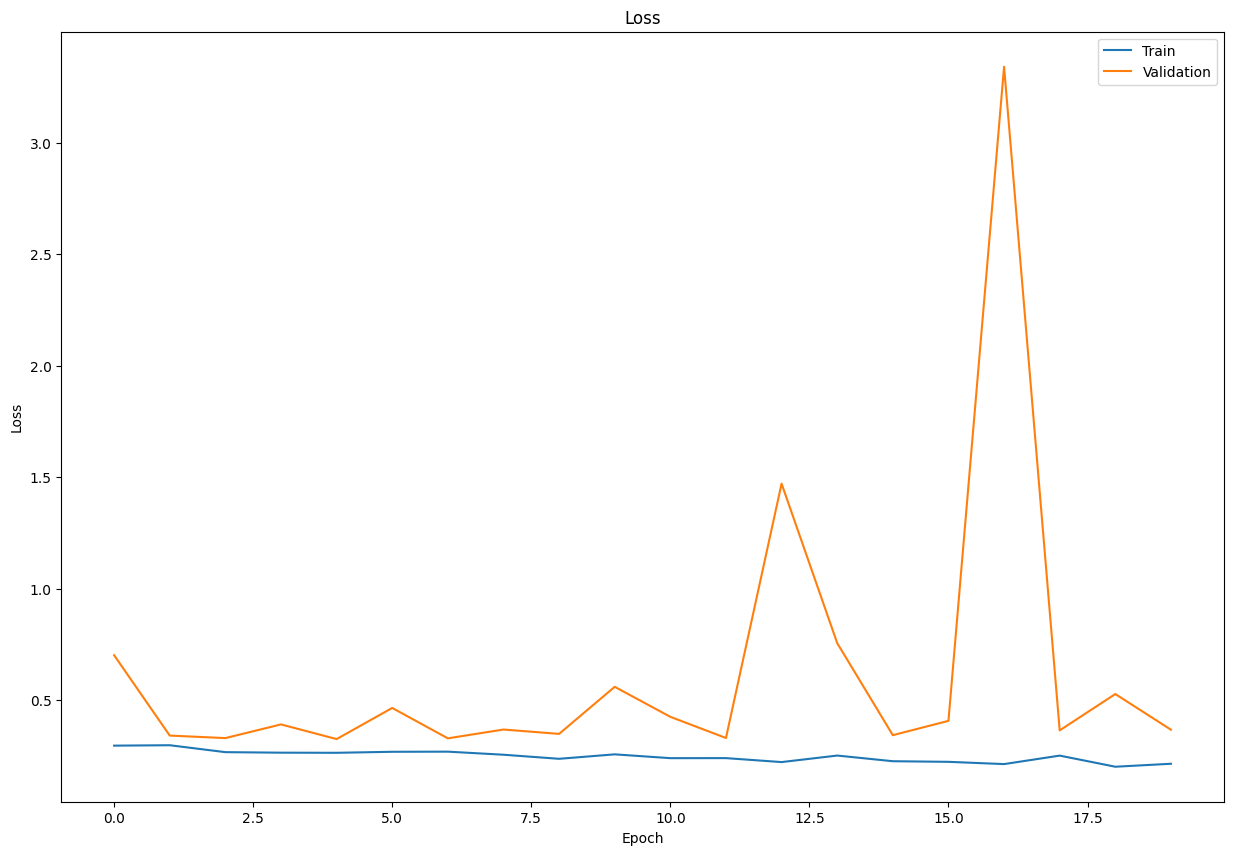

In [20]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

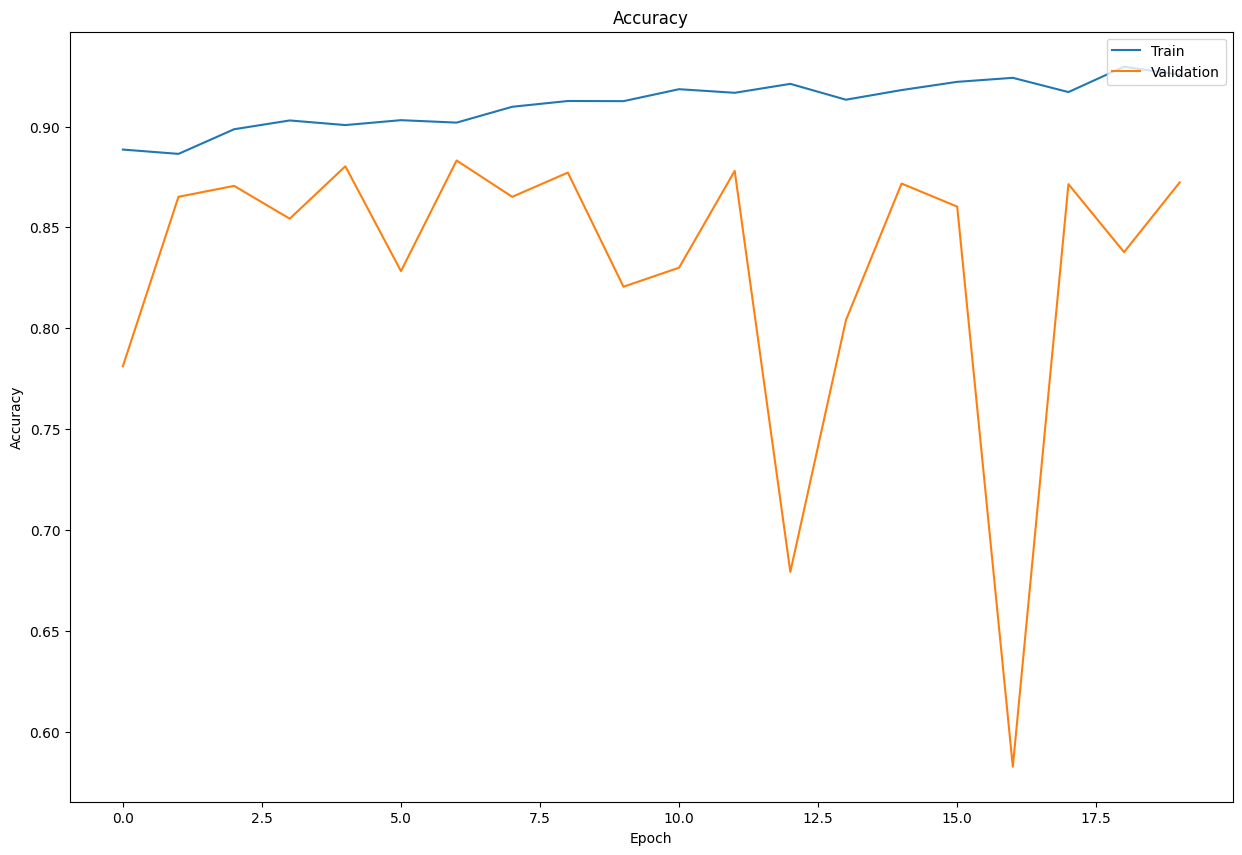

In [21]:
# Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(15, 10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [ ]:
# test semtiment-classifier on test set

def sentiment_classifier(review):
    review = review.replace("br", "")
    review = vectorizer.transform([review]).toarray()
    prediction = model.predict(review)
    return "Positive" if prediction[0][1] > prediction[0][0] else "Negative" 

print(sentiment_classifier("The movie is fantastic!"))
print(sentiment_classifier("The movie is terrible!"))
print(sentiment_classifier("The movie is bad!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Negative


In [23]:
sentences =[
    "The movie is fantastic!",
    "The movie is terrible!",
    "The movie is bad!",
    "I feel like it is boring and seen before",
    "I loved the plot!",
    "The second is the best one in the series!"
]

# vectorize the sentences
vetorized_sentences = vectorizer.transform(sentences).toarray()

# predict the sentiment of the sentences
predictions = model.predict(vetorized_sentences)


for sentence, prediction in zip(sentences, predictions):
    pos_prob = np.round(prediction[1], 2)
    neg_prob =  np.round(prediction[0], 2)
    print(sentence, "-", "Positive: {}".format(pos_prob) if prediction[1] > prediction[0] else "Negative: {}".format(neg_prob))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The movie is fantastic! - Positive: 0.8999999761581421
The movie is terrible! - Negative: 0.8999999761581421
The movie is bad! - Negative: 0.800000011920929
I feel like it is boring and seen before - Positive: 0.5099999904632568
I loved the plot! - Positive: 0.7699999809265137
The second is the best one in the series! - Positive: 0.8299999833106995
